In [ ]:
import numpy as np 
import pandas  as pd
import seaborn as sn
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,f1_score,confusion_matrix
from wordcloud import WordCloud
'''In addition, we'll also be using the word cloud library, which will let us visualize the most common

words from each class.

This will be helpful in understanding why our model behaves the way it does.'''
from sklearn.naive_bayes import MultinomialNB


In [ ]:
df= pd.read_csv('spam.csv',encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.columns = ['labels','data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


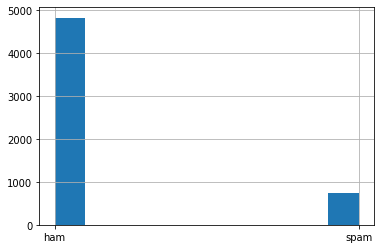

In [ ]:
df['labels'].hist()
# ther is a n imbalce of classes presnt here thus we havr to use other metrics to test the output


In [ ]:
df['b_labels'] = df['labels'].map({'ham':0,'spam' :1})
Y = df['b_labels'].to_numpy()

In [ ]:
df_train,df_test,ytrain,ytest = train_test_split(df['data'],Y,test_size = 0.33)

In [ ]:
featurizer = TfidfVectorizer(decode_error= 'ignore')
#featurizer = CountVectorizer(decode_error= 'ignore')
# "decode_error= 'ignore'" htis is put here because this dataset may copntain some invalifd UTF-8
# characters which shoould be just ignored
Xtrain = featurizer.fit_transform(df_train)
Xtest  = featurizer.transform(df_test)

In [ ]:
Xtrain.shape

(3733, 7045)

In [ ]:
model = MultinomialNB()
model.fit(Xtrain,ytrain)
print("the training accuracy ->",model.score(Xtrain,ytrain) )
print("the test accuracy ->",model.score(Xtest,ytest) )

the training accuracy -> 0.971068845432628
the test accuracy -> 0.9472539423599783


In [ ]:
P_train = model.predict(Xtrain)
P_test = model.predict(Xtest)
print(" Train F1 ->",f1_score(ytrain,P_train))
print(" Test F1 ->",f1_score(ytest,P_test))

 Train F1 -> 0.8775510204081634
 Test F1 -> 0.7616707616707616


In [ ]:
prob_train = model.predict_proba(Xtrain)[:,1]
prob_test = model.predict_proba(Xtest)[:,1]

print("  the AUC score ->",roc_auc_score(ytrain,prob_train))
print(" the test AUC score ->",roc_auc_score(ytest,prob_test))

  the AUC score -> 0.9971556204415994
 the test AUC score -> 0.9669762254828417


In [ ]:
cm = confusion_matrix(ytrain,P_train)

In [ ]:
cm

array([[3238,    0],
       [ 108,  387]])

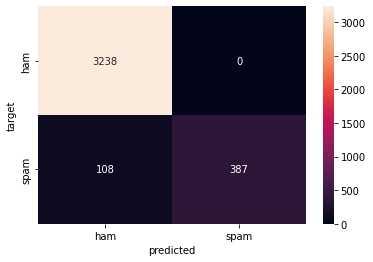

In [ ]:
def plot_cm(cm):
  classes = ['ham','spam']
  df_c  = pd.DataFrame(cm,index= classes,columns = classes)
  ax = sn.heatmap(df_c,annot=True,fmt='g')

  ax.set_xlabel('predicted')
  ax.set_ylabel('target')


plot_cm(cm)

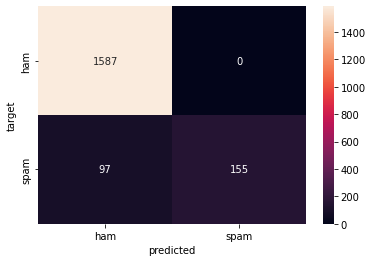

In [ ]:
cm_test = confusion_matrix(ytest,P_test)
plot_cm(cm_test)

In [ ]:
# visualize the data
def visualise(label):
  words=''
  for msg in  df[df['labels'] == label]['data']:
    msg =msg.lower()
    words += msg+' '
  
  wordcloud = WordCloud(width=600,height=400).generate(words)

  plt.imshow(wordcloud)
  plt.axis('off')
  plt.show()
  



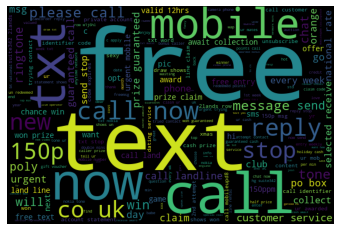

In [ ]:
visualise('spam')

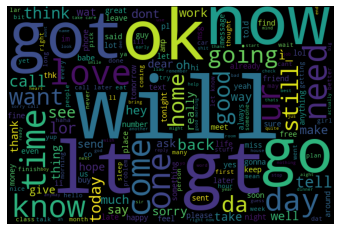

In [ ]:
visualise('ham')

In [ ]:
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)


In [ ]:
# th emesssages thaat had to be spam byt are not 
#,that s why we have the predictions as 0 wheras the true labels are "1"  that is "its spam"
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)] ['data']
for msg in sneaky_spam:
  print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Your free ringtone is waiting to be collected. Simply text the password \MIX\" to 85069 to verify. Get Usher and Britney. FML
You'll not rcv any more msgs from the chat svc. For FREE Hardcore services text GO to: 69988 If u get nothing u must Age Verify with yr network & try again
FreeMsg Why haven't you replied to my text? I'm Randy, sexy, female and live local. Luv to hear from u. Netcollex Ltd 08700621170150p per msg reply Stop to end
Customer service annoncement. You have a New Ye